In [102]:
!pip install shap fairlearn -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [103]:
import pandas as pd
import numpy as np

import shap
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from fairlearn.metrics import (
    MetricFrame,
    selection_rate,)

In [104]:
# -------------------------
# Load dataset
# -------------------------
df = pd.read_csv("heart.csv")

In [105]:
# Features and target
X = df.drop(columns=["target"])
y = df["target"]

In [106]:
# -------------------------
# Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [107]:
# -------------------------
# Train Decision Tree
# -------------------------
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [108]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [109]:
# -------------------------
# Predictions
# -------------------------
y_pred = model.predict(X_test)

In [110]:
# -------------------------
# Evaluation
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8731707317073171

Confusion Matrix:
[[89 11]
 [15 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       100
           1       0.89      0.86      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [121]:
# -------------------------
# Save model
# -------------------------
joblib.dump(model, "heart_model.joblib")

['heart_model.joblib']

In [112]:
# SHAP explanability

In [113]:
# -------------------------
# SHAP explainer (modern API)
# -------------------------
explainer = shap.Explainer(model, X)

# Compute SHAP values
shap_values = explainer(X)

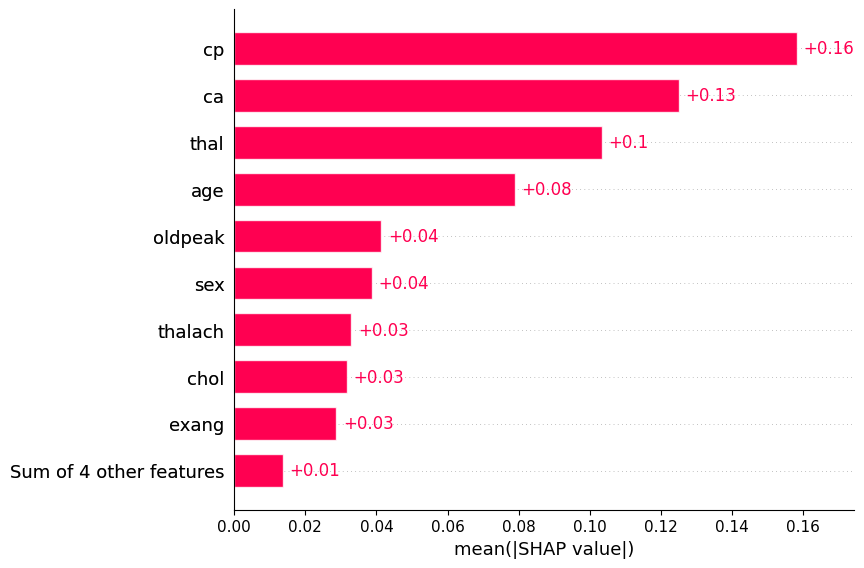

In [114]:
# For binary classification, select disease class (class=1)
shap.plots.bar(shap_values[:, :, 1])

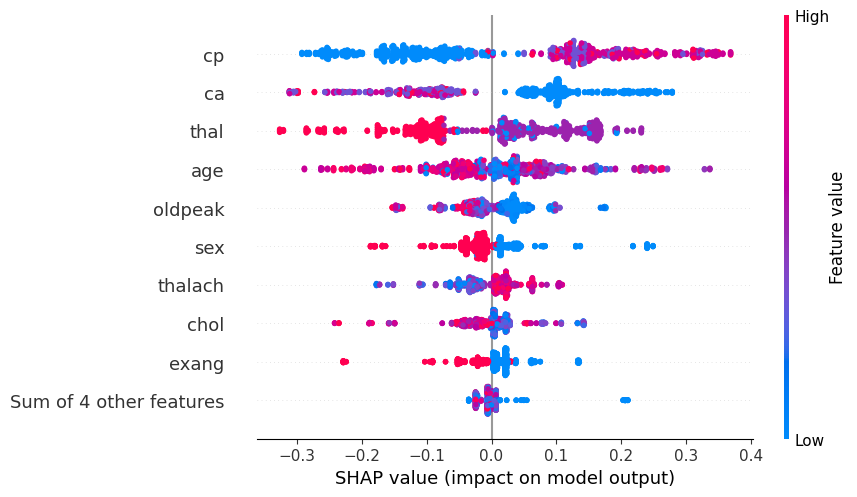

In [115]:
# For binary classification, select disease class (class=1)
shap.plots.beeswarm(shap_values[:, :, 1])

In [116]:
# fairlearn

In [117]:
# -------------------------
# Prepare test data
# -------------------------
X_test_fair = X_test.copy()
y_test_fair = y_test.copy()

# Sensitive attribute
sensitive_feature = X_test_fair["sex"]

In [118]:
# Predictions
y_pred = model.predict(X_test_fair)

In [119]:
# MetricFrame: group-wise metrics
# -------------------------
metric_frame = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "selection_rate": selection_rate
    },
    y_true=y_test_fair,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

In [120]:
print("=== Overall metrics ===")
print(metric_frame.overall)

print("\n=== Metrics by gender (sex) ===")
print(metric_frame.by_group)

=== Overall metrics ===
accuracy          0.873171
selection_rate    0.492683
dtype: float64

=== Metrics by gender (sex) ===
     accuracy  selection_rate
sex                          
0    0.870968        0.725806
1    0.874126        0.391608
